In [27]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from pathlib import Path
import scipy.stats as stats
import plotly.express as px

In [28]:
def linear_regression_plot(x, y):
    # Perform linear regression
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(x, y.astype(int))
    regression_line = pe_slope * np.array(x) + pe_int

    print(f'The r-value is: {round(pe_r,2)}')

    # Plotting
    plt.scatter(x, y, label='Data Points')
    plt.plot(x, regression_line, color='red', label='Linear Regression')
    plt.annotate(f'y = {round(pe_slope,2)}x + {round(pe_int,2)}', xy=(min(x)+5,min(y)), 
                 xycoords='data', color='red', size=15)

In [29]:
merge_data = Path("../Resources/merge_file.csv")
merge_df = pd.read_csv(merge_data)
merge_df.head()

,State,2022_homelesess,2021_homelesess,2020_homelesess,2019_homelesess,2018_homelesess,2017_homelesess,2016_homelesess,2015_homelesess,2014_homelesess,...,2021_rental,2020_rental,2019_rental,2018_rental,2017_rental,2016_rental,2015_rental,2014_rental,2013_rental,2012_rental
0,AK,2320,1949,1949,1907,2016,1845,1940.0,1956.0,1784.0,...,2340.0,1990.0,2016.0,1967.0,1900.0,1903.0,1940.0,1957.0,1909.0,1908.0
1,AL,3752,2556,3351,3261,3434,3793,4111.0,3970.0,4561.0,...,1240.0,1054.0,1068.0,1042.0,1007.0,1016.0,958.0,1103.0,1022.0,945.0
2,AR,2459,2139,2366,2717,2712,2467,2463.0,2560.0,2936.0,...,1334.0,1134.0,1149.0,1121.0,1083.0,1081.0,1045.0,1075.0,953.0,929.0
3,AZ,13553,5460,10979,10007,9865,8947,9707.0,9896.0,10495.0,...,1556.0,1323.0,1340.0,1307.0,1263.0,1260.0,1227.0,1222.0,1210.0,1201.0
4,CA,171521,57468,161548,151278,129972,131532,118142.0,115738.0,113952.0,...,3040.0,2585.0,2619.0,2555.0,2469.0,2465.0,2345.0,2237.0,2132.0,2031.0


In [30]:
state_correlation = []
p_value_correlation = []

for k in merge_df["State"].index:
    homelesess = merge_df.iloc[k,1:12].values
    rental_price=merge_df.iloc[k,12:24].values
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(homelesess.astype(int), rental_price.astype(int))
    state_correlation.append(pe_r)
    p_value_correlation.append(pe_p)
    
state_correlation

[0.7032699158867,
 -0.5401698082906344,
 -0.7293032649055923,
 -0.08116113854907588,
 0.08526594988822515,
 -0.5864216882578707,
 -0.8126363860373677,
 -0.8896202899457616,
 0.9092862387030219,
 -0.8913837656671405,
 -0.8197139746785923,
 -0.5795651198821752,
 -0.6602339034331199,
 0.08358068871767334,
 -0.8510344810226538,
 -0.6951466484234711,
 -0.5368653080975704,
 -0.7538956786956933,
 0.11610161214340858,
 -0.6845013714734712,
 -0.9314993679703446,
 0.3535260061994191,
 -0.8039070726308136,
 -0.39066272481941383,
 -0.8897765018130165,
 -0.16098280106915572,
 -0.7018029831238649,
 -0.3217265790093112,
 -0.9023937506823502,
 0.41719035826646456,
 -0.7828607145369638,
 -0.04304561761185524,
 -0.49334961426540697,
 -0.4336043393658582,
 -0.6957100125021061,
 -0.7621767668600055,
 -0.007925107999305755,
 -0.8310621459897568,
 0.3137332761197743,
 -0.7113902122450045,
 0.3546001332873305,
 -0.29039288728404006,
 -0.7234249758266915,
 0.3119717148045225,
 -0.42629004206038074,
 0.8066778

In [31]:
fig = px.choropleth(locations=merge_df["State"], locationmode="USA-states", 
                    color=state_correlation, scope="usa", 
                    color_continuous_scale="Viridis")
fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))
fig.layout.coloraxis.colorbar.title = 'Correlation Coefficients'
fig.show()

In [32]:
fig = px.choropleth(locations=merge_df["State"], locationmode="USA-states", 
                    color=p_value_correlation, scope="usa", 
                    color_continuous_scale=[(0, "gray"), (0.1, "yellow"), (1, "purple")])
fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))
fig.layout.coloraxis.colorbar.title = 'p-value'
fig.show()

The r-value is: 0.09


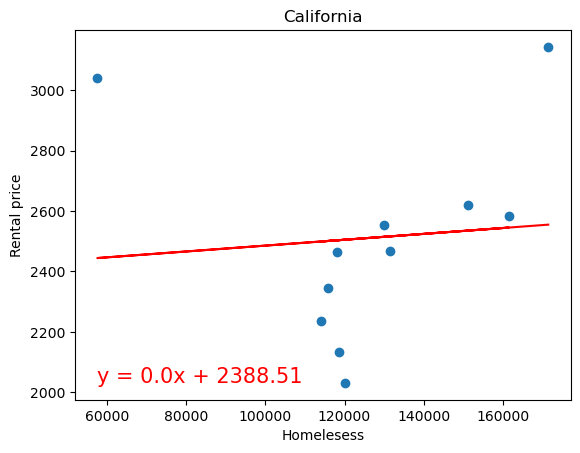

In [33]:
ca_idx = merge_df.loc[merge_df["State"]=='CA'].index
ca_idx = ca_idx[0]
homelesess_CA = merge_df.iloc[ca_idx,1:12].values
rental_price_CA=merge_df.iloc[ca_idx,12:24].values
linear_regression_plot(homelesess_CA.astype(int), rental_price_CA.astype(int))
plt.title("California")
plt.xlabel("Homelesess")
plt.ylabel("Rental price")
plt.show()

The r-value is: -0.93


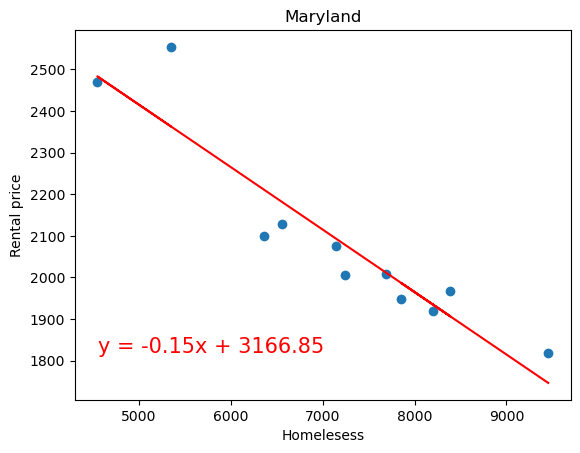

In [34]:
idx_min = min(state_correlation)
idx = state_correlation.index(idx_min)
name_state = merge_df.loc[idx,'State']
homelesess_value= merge_df.iloc[idx,1:12].values
rental_price_value=merge_df.iloc[idx,12:24].values
linear_regression_plot(homelesess_value.astype(int), rental_price_value.astype(int))
plt.title("Maryland")
plt.xlabel("Homelesess")
plt.ylabel("Rental price")
plt.show()

The r-value is: 0.91


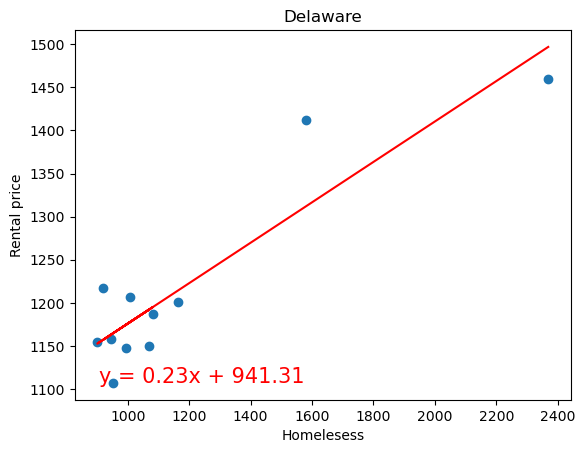

In [35]:
idx_min = max(state_correlation)
idx = state_correlation.index(idx_min)
name_state = merge_df.loc[idx,'State']
homelesess_value= merge_df.iloc[idx,1:12].values
rental_price_value=merge_df.iloc[idx,12:24].values
linear_regression_plot(homelesess_value.astype(int), rental_price_value.astype(int))
plt.title("Delaware")
plt.xlabel("Homelesess")
plt.ylabel("Rental price")
plt.show()

In [36]:
merge_df_correlation = merge_df
merge_df_correlation['Correlation'] = state_correlation
merge_df_correlation['p_value_correlations'] = p_value_correlation
merge_df_correlation.head()

,State,2022_homelesess,2021_homelesess,2020_homelesess,2019_homelesess,2018_homelesess,2017_homelesess,2016_homelesess,2015_homelesess,2014_homelesess,...,2019_rental,2018_rental,2017_rental,2016_rental,2015_rental,2014_rental,2013_rental,2012_rental,Correlation,p_value_correlations
0,AK,2320,1949,1949,1907,2016,1845,1940.0,1956.0,1784.0,...,2016.0,1967.0,1900.0,1903.0,1940.0,1957.0,1909.0,1908.0,0.703270,0.015761
1,AL,3752,2556,3351,3261,3434,3793,4111.0,3970.0,4561.0,...,1068.0,1042.0,1007.0,1016.0,958.0,1103.0,1022.0,945.0,-0.540170,0.086277
2,AR,2459,2139,2366,2717,2712,2467,2463.0,2560.0,2936.0,...,1149.0,1121.0,1083.0,1081.0,1045.0,1075.0,953.0,929.0,-0.729303,0.010869
3,AZ,13553,5460,10979,10007,9865,8947,9707.0,9896.0,10495.0,...,1340.0,1307.0,1263.0,1260.0,1227.0,1222.0,1210.0,1201.0,-0.081161,0.812485
4,CA,171521,57468,161548,151278,129972,131532,118142.0,115738.0,113952.0,...,2619.0,2555.0,2469.0,2465.0,2345.0,2237.0,2132.0,2031.0,0.085266,0.803158


In [37]:
neg_correlation = merge_df_correlation.loc[(merge_df_correlation['Correlation']<=0)&(merge_df_correlation['p_value_correlations']<=0.05),['State','Correlation']]
num_neg = neg_correlation["Correlation"].count().astype(int)/len(merge_df['Correlation'])*100

In [38]:
pos_correlation = merge_df_correlation.loc[(merge_df_correlation['Correlation']>=0)&(merge_df_correlation['p_value_correlations']<=0.05),['State','Correlation']]
num_pos = pos_correlation["Correlation"].count().astype(int)/len(merge_df['Correlation'])*100

In [39]:
no_correlation = merge_df_correlation.loc[(merge_df_correlation['p_value_correlations']>0.05),['State','Correlation']]
num_no = no_correlation["Correlation"].count().astype(int)/len(merge_df['Correlation'])*100

In [40]:
data = [[neg_correlation["Correlation"].count().astype(int),num_neg],[pos_correlation["Correlation"].count().astype(int),num_pos],[no_correlation["Correlation"].count().astype(int),num_no]]
correlation_data = pd.DataFrame(data, columns=['State_count', 'Correlation'])
correlation_data

,State_count,Correlation
0,22,44.897959
1,3,6.122449
2,24,48.979592


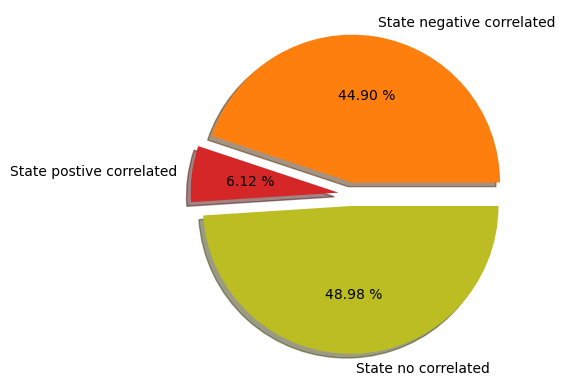

In [41]:
colors = ['C1','C3','C8']
myexplode = [0.08, 0.08, 0.08]
mylabels = ['State negative correlated', 'State postive correlated','State no correlated']
plt.pie(correlation_data['Correlation'], colors= colors, explode = myexplode, shadow= True, autopct = '%.2f %%',labels = mylabels)
plt.show() 

In [42]:
correlation_data['expected'] = [49 / 3] * 3
expected_counts = [49 / 3] * 3
correlation_data

,State_count,Correlation,expected
0,22,44.897959,16.333333
1,3,6.122449,16.333333
2,24,48.979592,16.333333


In [43]:
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
print(critical_value)
stats.chisquare(correlation_data['State_count'], correlation_data['expected'])

5.991464547107979


Power_divergenceResult(statistic=16.448979591836736, pvalue=0.00026800905360431477)